In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import mean_absolute_percentage_error as mape
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.metrics import r2_score

#
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers import Flatten, Dense, LSTM, Dropout


from sklearn.model_selection import GridSearchCV
from sklearn.feature_extraction.text import TfidfVectorizer
#from tensorflow.keras.wrappers.scikit_learn import KerasRegressor
from scikeras.wrappers import KerasRegressor
from sklearn.ensemble import AdaBoostRegressor

import pickle

# Load prepared data

In [2]:
dir_path = "/Users/chikakoolsen/opt/python/thesis/code/tdcs_thesis/"
# dir_path = "/Users/mriworkshop/Documents/TDCS/code/tdcs_thesis/"
save_path = dir_path+"data/raw/"
img_path =  dir_path+"data/processed/"
model_path = dir_path+"models/"

## fmap mean all experiments

In [3]:
file_mean = save_path+"fmap_mean_32to38.txt"
columns_mean =['exp', 'mini_exp', 'i', 'j', 'k', 'mean0', 'mean1', 'mean2', 'mean3', 'mean4', 'theory']
data = np.loadtxt(file_mean);

In [4]:
df = pd.DataFrame(data, columns=columns_mean)
df = df.astype({"exp": int, "i": int, "j": int, "k": int, "mini_exp": int})
df

,exp,mini_exp,i,j,k,mean0,mean1,mean2,mean3,mean4,theory
0,36,1,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
1,36,1,0,0,1,0.0,0.0,0.0,0.0,0.0,0.0
2,36,1,0,0,2,0.0,0.0,0.0,0.0,0.0,0.0
3,36,1,0,0,3,0.0,0.0,0.0,0.0,0.0,0.0
4,36,1,0,0,4,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
5046267,35,5,43,63,59,0.0,0.0,0.0,0.0,0.0,0.0
5046268,35,5,43,63,60,0.0,0.0,0.0,0.0,0.0,0.0
5046269,35,5,43,63,61,0.0,0.0,0.0,0.0,0.0,0.0
5046270,35,5,43,63,62,0.0,0.0,0.0,0.0,0.0,0.0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5046272 entries, 0 to 5046271
Data columns (total 11 columns):
 #   Column    Dtype  
---  ------    -----  
 0   exp       int64  
 1   mini_exp  int64  
 2   i         int64  
 3   j         int64  
 4   k         int64  
 5   mean0     float64
 6   mean1     float64
 7   mean2     float64
 8   mean3     float64
 9   mean4     float64
 10  theory    float64
dtypes: float64(6), int64(5)
memory usage: 423.5 MB


# Split data

## Data 1. fmap mean all experiments

In [6]:
df1_train = df[~((df['exp']==36) & ((df['mini_exp']==5) | (df['mini_exp']==6)))]
df1_val =  df[(df['exp']==36) & (df['mini_exp']==5)]
df1_test =  df[(df['exp']==36) & (df['mini_exp']==6)]

In [7]:
print(df1_train.shape)
print(df1_val.shape)
print(df1_test.shape)

(4685824, 11)
(180224, 11)
(180224, 11)


In [8]:
X1_train = df1_train.iloc[:, 5:-1].values 
y1_train = df1_train['theory'].values

X1_test = df1_val.iloc[:, 5:-1].values 
y1_test = df1_val['theory'].values

X1_pred = df1_test.iloc[:, 5:-1].values 
y1_pred = df1_val['theory'].values

In [9]:
print(X1_train.shape)
print(y1_train.shape)
print(X1_test.shape)
print(y1_test.shape)
print(X1_pred.shape)
print(y1_pred.shape)

(4685824, 5)
(4685824,)
(180224, 5)
(180224,)
(180224, 5)
(180224,)


## Data2: One experiment

In [10]:
df_train = df[(df['exp']==36) & (df['mini_exp']!=6)]
df_test = df[(df['exp']==36) & (df['mini_exp']==6)]

In [29]:
df_train.iloc[:, 5:-1]

,mean0,mean1,mean2,mean3,mean4
0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...
901115,0.0,0.0,0.0,0.0,0.0
901116,0.0,0.0,0.0,0.0,0.0
901117,0.0,0.0,0.0,0.0,0.0
901118,0.0,0.0,0.0,0.0,0.0


In [30]:
X2_train = df_train.iloc[:, 5:-1].values
y2_train = df_train['theory'].values

X2_test = df_test.iloc[:, 5:-1].values
y2_test = df_test['theory'].values

In [31]:
print(X2_train.shape)
print(y2_train.shape)
print(X2_test.shape)
print(y2_test.shape)

(901120, 5)
(901120,)
(180224, 5)
(180224,)


## Data4: None zero

In [11]:
df_nonzero = df[(df['mean0']!=0.0) & (df['mean1']!=0.0) & (df['mean2']!=0.0) & (df['mean3']!=0.0) & (df['mean4']!=0.0)]

In [12]:
df_nonzero

,exp,mini_exp,i,j,k,mean0,mean1,mean2,mean3,mean4,theory
30760,36,1,7,32,40,118.874306,102.631088,73.720810,46.604973,35.842915,4.988159
30761,36,1,7,32,41,-69.809402,-88.836975,-115.809509,-147.981812,-157.407669,4.591202
30762,36,1,7,32,42,-501.965088,-518.938477,-546.379456,-559.395264,-578.390381,4.237324
30763,36,1,7,32,43,-729.152405,-748.379883,-771.094543,-794.678772,-810.996643,3.918999
30799,36,1,7,33,15,-1217.971191,-1236.205566,-1261.405762,-1284.039307,-1296.501587,3.371496
...,...,...,...,...,...,...,...,...,...,...,...
5011735,35,5,35,36,23,321.924683,342.532410,335.163940,323.188599,335.096008,8.047899
5011736,35,5,35,36,24,280.548309,296.518066,293.497314,285.676575,294.248779,7.110718
5011737,35,5,35,36,25,216.092102,232.253601,229.062576,219.861847,229.366959,6.379625
5011738,35,5,35,36,26,118.546364,135.199966,132.178497,124.143974,132.757050,5.780618


In [13]:
df4_train = df_nonzero[~((df_nonzero['exp']==36) & ((df_nonzero['mini_exp']==6) | (df_nonzero['mini_exp']==5)))]
df4_test =  df_nonzero[(df_nonzero['exp']==36) & (df_nonzero['mini_exp']==5)]
df4_pred =  df_nonzero[(df_nonzero['exp']==36) & (df_nonzero['mini_exp']==6)]

In [14]:
X4_train = df4_train.iloc[:, 5:-1].values
y4_train = df4_train['theory'].values

X4_test = df4_test.iloc[:, 5:-1].values
y4_test = df4_test['theory'].values

X4_pred = df4_pred.iloc[:, 5:-1].values
y4_pred = df4_pred['theory'].values

In [25]:
# X = df_nonzero.iloc[:, 5:-1].values
# y = df_nonzero['theory'].values

# X4_train, X4_test, y4_train, y4_test = train_test_split(
#     X, y, test_size=0.3, random_state=0)

In [15]:
# print(X.shape)
# print(y.shape)
print(X4_train.shape)
print(y4_train.shape)
print(X4_test.shape)
print(y4_test.shape)
print(X4_pred.shape)
print(y4_pred.shape)

(870485, 5)
(870485,)
(34011, 5)
(34011,)
(34012, 5)
(34012,)


# Include zero 36 to 38

In [ ]:
X_train = X4_train
y_train = y4_train
X_test = X4_test
y_test = y4_test

In [47]:
shape = (len(X_train[0]),1)
model = keras.Sequential()
model.add(LSTM(10, return_sequences=True, input_shape=shape)) 
# model.add(Dropout(0.2))
model.add(LSTM(10, return_sequences=True)) 
# model.add(Dropout(0.2))
model.add(LSTM(10, return_sequences=False)) 
# model.add(Dropout(0.2))
model.add(Dense(1, activation='linear'))
model.compile(optimizer='adam', loss='mse', metrics=["accuracy"])

In [48]:
history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=[X_test, y_test])

Epoch 1/100
90112/90112 [==============================] - 322s 4ms/step - loss: 48.1632 - accuracy: 0.7208 - val_loss: 32.9915 - val_accuracy: 0.8112
Epoch 2/100
90112/90112 [==============================] - 310s 3ms/step - loss: 47.5180 - accuracy: 0.6939 - val_loss: 30.1213 - val_accuracy: 0.8112
Epoch 3/100
90112/90112 [==============================] - 326s 4ms/step - loss: 47.5706 - accuracy: 0.7001 - val_loss: 31.1828 - val_accuracy: 0.8112
Epoch 4/100
90112/90112 [==============================] - 327s 4ms/step - loss: 47.2081 - accuracy: 0.7022 - val_loss: 30.2358 - val_accuracy: 0.8112
Epoch 5/100
90112/90112 [==============================] - 320s 4ms/step - loss: 47.0433 - accuracy: 0.7060 - val_loss: 29.3523 - val_accuracy: 0.8112
Epoch 6/100
90112/90112 [==============================] - 333s 4ms/step - loss: 47.1110 - accuracy: 0.7076 - val_loss: 29.6987 - val_accuracy: 0.8112
Epoch 7/100
90112/90112 [==============================] - 338s 4ms/step - loss: 46.8015 - acc

Epoch 55/100
90112/90112 [==============================] - 350s 4ms/step - loss: 47.5240 - accuracy: 0.6699 - val_loss: 31.7952 - val_accuracy: 0.8112
Epoch 56/100
90112/90112 [==============================] - 357s 4ms/step - loss: 47.5050 - accuracy: 0.6790 - val_loss: 31.2604 - val_accuracy: 0.8112
Epoch 57/100
90112/90112 [==============================] - 342s 4ms/step - loss: 47.6001 - accuracy: 0.6719 - val_loss: 30.4656 - val_accuracy: 0.8112
Epoch 58/100
90112/90112 [==============================] - 320s 4ms/step - loss: 47.8163 - accuracy: 0.6678 - val_loss: 30.8031 - val_accuracy: 0.8112
Epoch 59/100
90112/90112 [==============================] - 329s 4ms/step - loss: 47.5084 - accuracy: 0.6801 - val_loss: 30.0428 - val_accuracy: 0.8112
Epoch 60/100
90112/90112 [==============================] - 366s 4ms/step - loss: 47.6383 - accuracy: 0.6690 - val_loss: 30.9036 - val_accuracy: 0.8112
Epoch 61/100
90112/90112 [==============================] - 370s 4ms/step - loss: 47.557

In [49]:
train_pred = model.predict(X_train)
print(mse(train_pred, y_train))
print(mape(train_pred, y_train))
test_pred = model.predict(X_test)
print(mse(test_pred, y_test))
print(mape(test_pred, y_test))

90112/90112 [==============================] - 142s 2ms/step
46.837260005373416
0.9270711865205015
5632/5632 [==============================] - 8s 1ms/step
28.444068311173385
0.9633500911609041


In [50]:
model.evaluate(X_test, y_test)

5632/5632 [==============================] - 9s 2ms/step - loss: 28.4440 - accuracy: 0.8112


[28.444019317626953, 0.81121826171875]

In [51]:
np.corrcoef(test_pred.flatten(), y_test)

array([[1.      , 0.722415],
       [0.722415, 1.      ]])

In [52]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_9 (LSTM)               (None, 5, 10)             480       
                                                                 
 dropout_9 (Dropout)         (None, 5, 10)             0         
                                                                 
 lstm_10 (LSTM)              (None, 5, 10)             840       
                                                                 
 dropout_10 (Dropout)        (None, 5, 10)             0         
                                                                 
 lstm_11 (LSTM)              (None, 10)                840       
                                                                 
 dropout_11 (Dropout)        (None, 10)                0         
                                                                 
 dense_3 (Dense)             (None, 1)                

In [53]:
history.history

{'loss': [48.1632080078125,
  47.517967224121094,
  47.570556640625,
  47.2081184387207,
  47.04327392578125,
  47.1109619140625,
  46.801513671875,
  47.63278579711914,
  47.46784973144531,
  47.17329406738281,
  47.1805305480957,
  47.50630187988281,
  47.33260726928711,
  47.24543762207031,
  47.118675231933594,
  46.95441818237305,
  47.07136535644531,
  46.94698715209961,
  46.84856033325195,
  46.99142837524414,
  46.892337799072266,
  46.934715270996094,
  46.924556732177734,
  46.82863998413086,
  46.7032356262207,
  46.879417419433594,
  47.02273941040039,
  46.77342224121094,
  46.897701263427734,
  46.975032806396484,
  47.427059173583984,
  47.0705451965332,
  47.124595642089844,
  48.074562072753906,
  47.996334075927734,
  48.051212310791016,
  48.226783752441406,
  47.874942779541016,
  47.71353530883789,
  48.54345703125,
  48.401390075683594,
  47.82416915893555,
  47.826011657714844,
  47.957435607910156,
  47.93754959106445,
  47.99684143066406,
  48.371517181396484,

In [54]:
file = model_path+'model_lstm_36to38.sav'
pickle.dump(model, open(file, 'wb'))

INFO:tensorflow:Assets written to: ram:///var/folders/yd/vkjb_lqj2_30lnyhzhjqtg9w0000gp/T/tmpj4a94bwu/assets


INFO:tensorflow:Assets written to: ram:///var/folders/yd/vkjb_lqj2_30lnyhzhjqtg9w0000gp/T/tmpj4a94bwu/assets


In [21]:
load_model = pickle.load(open(file, 'rb'))
result = load_model.evaluate(X_test, y_test)
print(result)

1063/1063 [==============================] - 1s 842us/step - loss: 56.8737 - accuracy: 8.8204e-04
[56.87367630004883, 0.0008820416405797005]


## Plot

### Loss function (MSE)

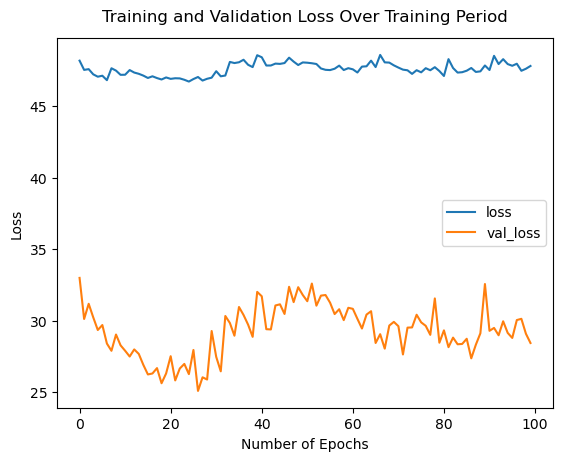

In [56]:
model_df = pd.DataFrame(history.history)
model_df[['loss', 'val_loss']].plot()
plt.xlabel("Number of Epochs")
plt.ylabel("Loss")
plt.title("Training and Validation Loss Over Training Period", pad=12);

### Accuracy

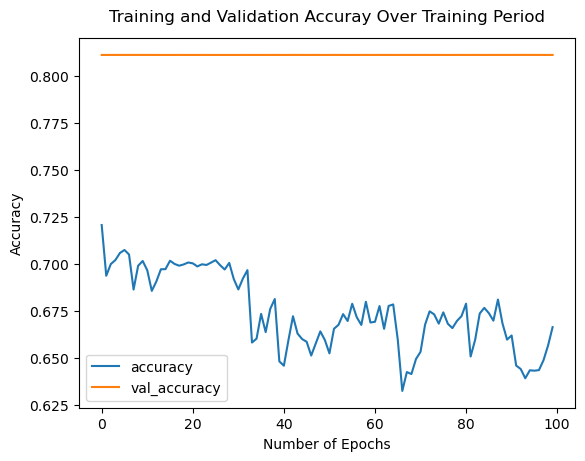

In [57]:
model_df[['accuracy', 'val_accuracy']].plot()
plt.xlabel("Number of Epochs")
plt.ylabel("Accuracy")
plt.title("Training and Validation Accuray Over Training Period", pad=12);

### Theory vs Predict

r: 0.72242%, st_er: 0.000866%
y = 0.3842*x + 0.7403


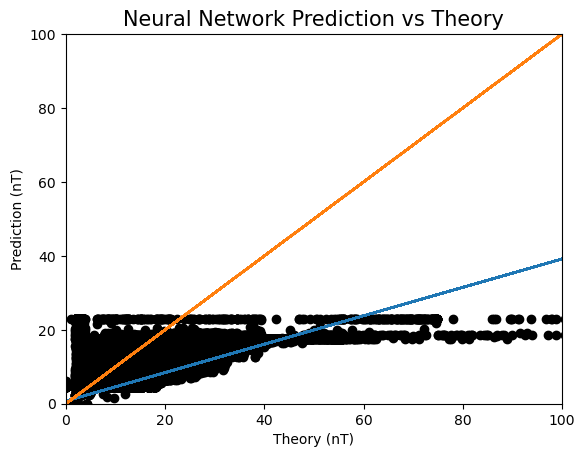

In [66]:
x = y_test.flatten()
y = test_pred.flatten()
m, b, r, p, st_er = stats.linregress(x,y) 

yfit = [b + m * xi for xi in x]
yisx = [0 + 1 * xi for xi in x]
plt.plot(x, yfit)
plt.plot(x, yisx)

plt.scatter(y_test, test_pred,  color='black')
plt.axis([0,100, 0, 100])
plt.xlabel("Theory (nT)")
plt.ylabel("Prediction (nT)")
plt.title("Neural Network Prediction vs Theory", fontsize=15)
# print(r, st_er)
print("r: {:.5f}, st_er: {:.6f}".format(r, st_er))
print("y = "+str(round(m,4))+"*x + "+str(round(b,4)))

# Output data

In [67]:
test_pred = model.predict(X1_pred)

5632/5632 [==============================] - 8s 1ms/step


In [68]:
df_test['predict'] = test_pred

/var/folders/yd/vkjb_lqj2_30lnyhzhjqtg9w0000gp/T/ipykernel_1018/4195812830.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test['predict'] = test_pred


In [69]:
np.savetxt(img_path+"nn_lstm_36to38.txt", df_test[['i', 'j', 'k', 'predict']], fmt="%i %i %i %s")

In [70]:
df_test

,exp,mini_exp,i,j,k,mean0,mean1,mean2,mean3,mean4,theory,predict
901120,36,6,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.007007
901121,36,6,0,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.007007
901122,36,6,0,0,2,0.0,0.0,0.0,0.0,0.0,0.0,0.007007
901123,36,6,0,0,3,0.0,0.0,0.0,0.0,0.0,0.0,0.007007
901124,36,6,0,0,4,0.0,0.0,0.0,0.0,0.0,0.0,0.007007
...,...,...,...,...,...,...,...,...,...,...,...,...
1081339,36,6,43,63,59,0.0,0.0,0.0,0.0,0.0,0.0,0.007007
1081340,36,6,43,63,60,0.0,0.0,0.0,0.0,0.0,0.0,0.007007
1081341,36,6,43,63,61,0.0,0.0,0.0,0.0,0.0,0.0,0.007007
1081342,36,6,43,63,62,0.0,0.0,0.0,0.0,0.0,0.0,0.007007


# Non zero 32 to 38

In [16]:
X_train = X4_train
y_train = y4_train
X_test = X4_test
y_test = y4_test

In [17]:
shape = (len(X_train[0]),1)
model = keras.Sequential()
model.add(LSTM(10, return_sequences=True, input_shape=shape)) 
# model.add(Dropout(0.2))
model.add(LSTM(10, return_sequences=True)) 
# model.add(Dropout(0.2))
model.add(LSTM(10, return_sequences=False)) 
# model.add(Dropout(0.2))
model.add(Dense(1, activation='linear'))
model.compile(optimizer='adam', loss='mse', metrics=["accuracy"])

2022-11-26 09:27:14.847693: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [18]:
history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=[X_test, y_test])

Epoch 1/100
27203/27203 [==============================] - 203s 7ms/step - loss: 17087.2051 - accuracy: 3.2166e-05 - val_loss: 132.1913 - val_accuracy: 2.9402e-05
Epoch 2/100
27203/27203 [==============================] - 198s 7ms/step - loss: 17082.3457 - accuracy: 2.9868e-05 - val_loss: 147.6514 - val_accuracy: 2.9402e-05
Epoch 3/100
27203/27203 [==============================] - 198s 7ms/step - loss: 17080.4336 - accuracy: 3.1017e-05 - val_loss: 143.4086 - val_accuracy: 2.9402e-05
Epoch 4/100
27203/27203 [==============================] - 198s 7ms/step - loss: 17082.9238 - accuracy: 3.2166e-05 - val_loss: 128.6850 - val_accuracy: 2.9402e-05
Epoch 5/100
27203/27203 [==============================] - 198s 7ms/step - loss: 17078.7891 - accuracy: 3.3315e-05 - val_loss: 125.9065 - val_accuracy: 2.9402e-05
Epoch 6/100
27203/27203 [==============================] - 198s 7ms/step - loss: 17080.6172 - accuracy: 2.9868e-05 - val_loss: 124.5161 - val_accuracy: 2.9402e-05
Epoch 7/100
27203/2720

27203/27203 [==============================] - 198s 7ms/step - loss: 17075.6172 - accuracy: 3.1017e-05 - val_loss: 125.1829 - val_accuracy: 2.9402e-05
Epoch 52/100
27203/27203 [==============================] - 198s 7ms/step - loss: 17074.5566 - accuracy: 2.9868e-05 - val_loss: 124.6581 - val_accuracy: 2.9402e-05
Epoch 53/100
27203/27203 [==============================] - 199s 7ms/step - loss: 17079.8301 - accuracy: 3.2166e-05 - val_loss: 130.0852 - val_accuracy: 2.9402e-05
Epoch 54/100
27203/27203 [==============================] - 198s 7ms/step - loss: 17077.5391 - accuracy: 2.9868e-05 - val_loss: 128.4978 - val_accuracy: 2.9402e-05
Epoch 55/100
27203/27203 [==============================] - 198s 7ms/step - loss: 17074.4570 - accuracy: 2.9868e-05 - val_loss: 130.6770 - val_accuracy: 2.9402e-05
Epoch 56/100
27203/27203 [==============================] - 199s 7ms/step - loss: 17074.6074 - accuracy: 2.9868e-05 - val_loss: 123.8273 - val_accuracy: 2.9402e-05
Epoch 57/100
27203/27203 [===

In [19]:
train_pred = model.predict(X_train)
print(mse(train_pred, y_train))
print(mape(train_pred, y_train))
test_pred = model.predict(X_test)
print(mse(test_pred, y_test))
print(mape(test_pred, y_test))

27203/27203 [==============================] - 43s 2ms/step
17077.582513891342
0.5218505479985815
1063/1063 [==============================] - 2s 2ms/step
129.55253341920286
0.451908174471915


In [23]:
model.evaluate(X_test, y_test)

1063/1063 [==============================] - 2s 2ms/step - loss: 129.5526 - accuracy: 2.9402e-05


[129.5525665283203, 2.9402252039290033e-05]

In [24]:
np.corrcoef(test_pred.flatten(), y_test)

array([[1.        , 0.58200616],
       [0.58200616, 1.        ]])

In [25]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 5, 10)             480       
                                                                 
 lstm_1 (LSTM)               (None, 5, 10)             840       
                                                                 
 lstm_2 (LSTM)               (None, 10)                840       
                                                                 
 dense (Dense)               (None, 1)                 11        
                                                                 
Total params: 2,171
Trainable params: 2,171
Non-trainable params: 0
_________________________________________________________________


In [26]:
history.history

{'loss': [17087.205078125,
  17082.345703125,
  17080.43359375,
  17082.923828125,
  17078.7890625,
  17080.6171875,
  17079.712890625,
  17080.494140625,
  17079.001953125,
  17075.1875,
  17073.56640625,
  17075.84765625,
  17075.32421875,
  17074.013671875,
  17078.134765625,
  17073.666015625,
  17076.955078125,
  17077.861328125,
  17077.646484375,
  17078.73046875,
  17075.419921875,
  17078.1640625,
  17074.3203125,
  17075.78515625,
  17075.8125,
  17072.400390625,
  17077.458984375,
  17079.4375,
  17076.15625,
  17075.6953125,
  17078.5078125,
  17076.05859375,
  17078.21875,
  17078.99609375,
  17076.025390625,
  17078.76953125,
  17072.935546875,
  17078.197265625,
  17078.076171875,
  17076.248046875,
  17076.236328125,
  17075.50390625,
  17073.78515625,
  17074.5,
  17080.123046875,
  17077.287109375,
  17077.869140625,
  17077.232421875,
  17078.37890625,
  17075.78125,
  17075.6171875,
  17074.556640625,
  17079.830078125,
  17077.5390625,
  17074.45703125,
  17074.607

In [27]:
file = model_path+'model_lstm_nonzero_32to38.sav'
pickle.dump(model, open(file, 'wb'))

INFO:tensorflow:Assets written to: ram:///var/folders/yd/vkjb_lqj2_30lnyhzhjqtg9w0000gp/T/tmpjprfn3yq/assets


INFO:tensorflow:Assets written to: ram:///var/folders/yd/vkjb_lqj2_30lnyhzhjqtg9w0000gp/T/tmpjprfn3yq/assets


## Plot

### Loss function (MSE)

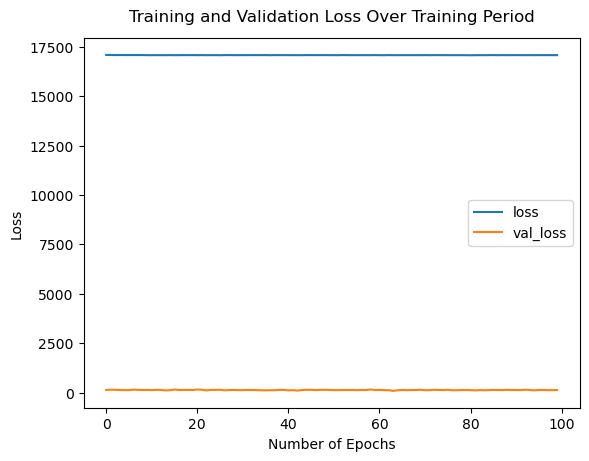

In [28]:
model_df = pd.DataFrame(history.history)
model_df[['loss', 'val_loss']].plot()
plt.xlabel("Number of Epochs")
plt.ylabel("Loss")
plt.title("Training and Validation Loss Over Training Period", pad=12);

### Accuracy

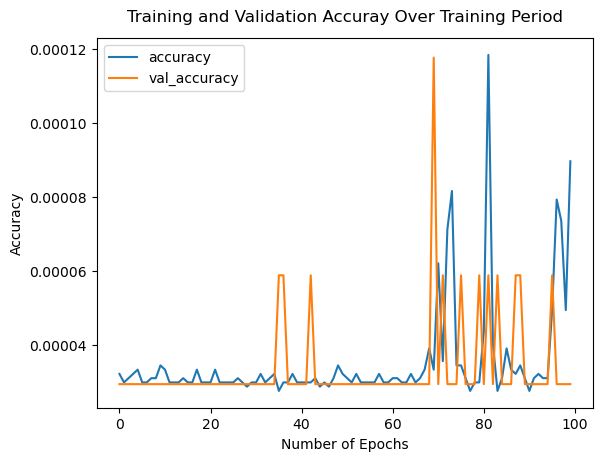

In [29]:
model_df[['accuracy', 'val_accuracy']].plot()
plt.xlabel("Number of Epochs")
plt.ylabel("Accuracy")
plt.title("Training and Validation Accuray Over Training Period", pad=12);

### Theory vs Predict

r: 0.58201, st_er: 0.002013
y = 0.2657*x + 7.0237


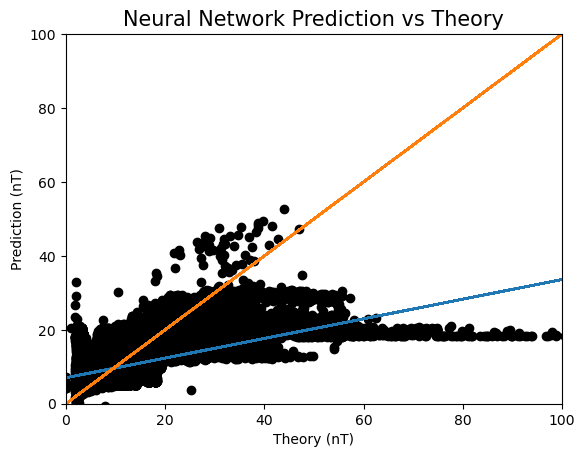

In [30]:
x = y_test.flatten()
y = test_pred.flatten()
m, b, r, p, st_er = stats.linregress(x,y) 

yfit = [b + m * xi for xi in x]
yisx = [0 + 1 * xi for xi in x]
plt.plot(x, yfit)
plt.plot(x, yisx)

plt.scatter(y_test, test_pred,  color='black')
plt.axis([0,100, 0, 100])
plt.xlabel("Theory (nT)")
plt.ylabel("Prediction (nT)")
plt.title("Neural Network Prediction vs Theory", fontsize=15)
# print(r, st_er)
print("r: {:.5f}, st_er: {:.6f}".format(r, st_er))
print("y = "+str(round(m,4))+"*x + "+str(round(b,4)))

# Output data

In [31]:
df_test['predict'] = 0

/var/folders/yd/vkjb_lqj2_30lnyhzhjqtg9w0000gp/T/ipykernel_39463/706090855.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test['predict'] = 0


In [32]:
test_pred = model.predict(X4_pred)

1063/1063 [==============================] - 2s 2ms/step


In [33]:
df4_pred['predict'] = test_pred

/var/folders/yd/vkjb_lqj2_30lnyhzhjqtg9w0000gp/T/ipykernel_39463/2364276288.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df4_pred['predict'] = test_pred


In [34]:
df4_pred

,exp,mini_exp,i,j,k,mean0,mean1,mean2,mean3,mean4,theory,predict
931880,36,6,7,32,40,-183.593781,-184.268631,-199.538742,-215.528793,-215.355865,4.988159,8.291834
931881,36,6,7,32,41,-383.761566,-383.066467,-395.916077,-417.522858,-420.110077,4.591202,5.327755
931882,36,6,7,32,42,-779.052185,-785.270813,-803.943787,-811.441101,-799.951233,4.237324,5.076020
931883,36,6,7,32,43,-1017.557312,-1026.294189,-1037.133667,-1050.012451,-1046.674072,3.918999,5.372490
931919,36,6,7,33,15,-1508.948120,-1513.032471,-1527.041992,-1536.478027,-1540.133301,3.371496,5.398032
...,...,...,...,...,...,...,...,...,...,...,...,...
1050968,36,6,36,37,24,-27.330389,-28.598026,-46.617607,-59.281792,-58.657875,7.175758,5.586590
1050979,36,6,36,37,35,171.250366,175.768433,151.715485,130.792816,139.797287,8.527348,17.388025
1050982,36,6,36,37,38,-96.352455,-94.962585,-115.256683,-131.555984,-127.650993,6.039019,9.733315
1050983,36,6,36,37,39,-235.110947,-235.878754,-253.580444,-268.104340,-266.388824,5.501382,7.674119


In [35]:
df_out = df_test[['i', 'j', 'k', 'predict']]
df_pre = df4_pred[['i', 'j', 'k', 'predict']]

In [36]:
for x in range(len(df_pre)):
    i = df_pre.iloc[x, :]['i'].astype(int)
    j = df_pre.iloc[x, :]['j'].astype(int)
    k = df_pre.iloc[x, :]['k'].astype(int)
    pred = df_pre.iloc[x, :]['predict']
    idx = df_out[(df_out['i']==i) & (df_out['j']==j) & (df_out['k']==k)].index
    df_out.loc[idx, 'predict']= pred

/var/folders/yd/vkjb_lqj2_30lnyhzhjqtg9w0000gp/T/ipykernel_39463/1223735758.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_out.loc[idx, 'predict']= pred


In [37]:
df_out[(df_out['i']==7) & (df_out['j']==32) & (df_out['k']==40)]

,i,j,k,predict
931880,7,32,40,8.291834


In [38]:
np.savetxt(img_path+"nn_lstm_nonzero_32to38.txt", df_out[['i', 'j', 'k', 'predict']], fmt="%i %i %i %s")